In [4]:
# 데이터 준비하기

from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 평균과 표준편차는 채널별로 구해줍니다.
norm_layer = tf.keras.layers.Normalization(axis = -1, dtype = 'float32')
norm_layer.adapt(x_train)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)

print('data ready~')

data ready~


In [5]:
# CIFAR-10 드롭아웃 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Dropout(0.2))     # 드롭아웃을 추가합니다.

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Dropout(0.2))     # 드롭아웃을 추가합니다.

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Dropout(0.2))     # 드롭아웃을 추가합니다.

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 모델 학습하기

history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 120s 93ms/step - acc: 0.2195 - loss: 2.6418 - val_acc: 0.4291 - val_loss: 1.5727
Epoch 2/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 98s 90ms/step - acc: 0.4240 - loss: 1.5733 - val_acc: 0.5111 - val_loss: 1.3636
Epoch 3/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 93s 85ms/step - acc: 0.5056 - loss: 1.3724 - val_acc: 0.5639 - val_loss: 1.2290
Epoch 4/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 146s 88ms/step - acc: 0.5590 - loss: 1.2191 - val_acc: 0.6188 - val_loss: 1.0709
Epoch 5/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 119s 108ms/step - acc: 0.6155 - loss: 1.0892 - val_acc: 0.6203 - val_loss: 1.0818
Epoch 6/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 131s 120ms/step - acc: 0.6478 - loss: 1.0024 - val_acc: 0.6619 - val_loss: 0.9624
Epoch 7/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 148s 135ms/step - acc: 0.6785 - loss: 0.9199 - val_acc: 0.6795 - val_loss: 0.9205
Epoch 8/30
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 117s 107ms/step - acc: 0.6926 - loss: 0.8711 - val_acc: 0.7055 - val_loss: 0.8443
Epoch 9/30
109

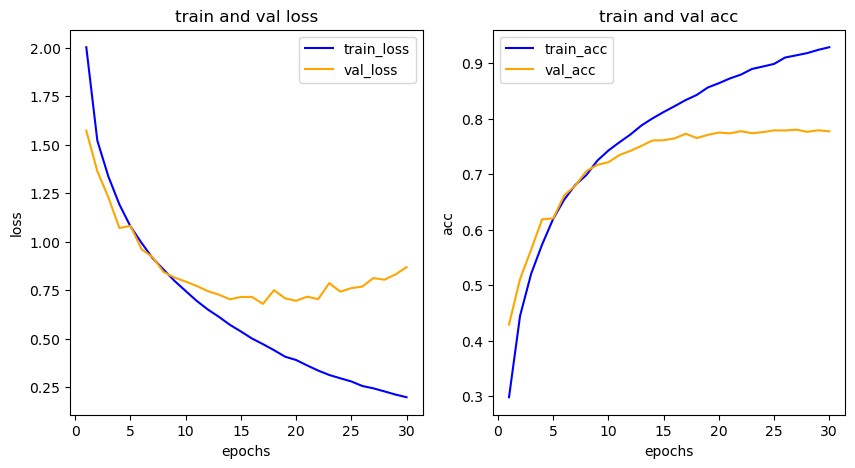

In [8]:
# 학습 과정 그리기

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()